In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import xgboost as xgb

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from xgboost import plot_importance
#import graphviz
#from xgboost import early_stopping

In [4]:
df = pd.read_csv('data_set.csv')

In [5]:
df.head()

,Unnamed: 0,id,id_number,age,gender,education,status,start years,year_experience,crops,...,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12,credit_score,credit_utilization,credit_inquiry
0,1,8.100000e+12,3006,56,Female,Primary School,Married,31,25,palm oil,...,69.3,128.9,69.9,82.7,65.6,120.4,129.4,NaN,NaN,NaN
1,2,8.100000e+12,2675,64,Male,Primary School,Never Married,26,38,palm oil,...,58.4,173.7,55.6,121.1,154.7,73.6,193.9,NaN,NaN,NaN
2,3,8.100000e+12,11650,51,Male,Primary School,Married,25,26,palm oil,...,185.8,118.8,199.0,150.1,117.2,86.2,77.4,NaN,NaN,NaN
3,4,8.100000e+12,12072,40,Male,Primary School,Never Married,29,11,palm oil,...,70.2,119.8,91.2,79.3,192.3,190.0,88.9,NaN,NaN,NaN
4,5,8.100000e+12,3361,41,Male,Primary School,Married,25,16,palm oil,...,177.5,124.1,192.8,159.8,186.6,157.2,68.1,NaN,NaN,NaN


### Dropping columns

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'id_number', 'age', 'gender', 'education', 'status',
       'start years', 'year_experience', 'crops', 'size_rai',
       ' yield (kg/rai) ', ' yield (ton) ', ' mkt_price (THB/ton) ',
       'soil_quality', 'annual_income', ' cost (THB/ton) ', 'annual_expense',
       'profit_loss', 'existing_loan', ' Saving/year ', 'loan_status',
       'issue_date', 'addr_subdist', 'addr_district', 'addr_province',
       'zip_code', 'temp_1', 'temp_2', 'temp_3', 'temp_4', 'temp_5', 'temp_6',
       'temp_7', 'temp_8', 'temp_9', 'temp_10', 'temp_11', 'temp_12', 'rain_1',
       'rain_2', 'rain_3', 'rain_4', 'rain_5', 'rain_6', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'rain_11', 'rain_12', 'credit_score',
       'credit_utilization', 'credit_inquiry'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0', 'id', 'id_number', ' yield (ton) ', 'profit_loss', 'issue_date', 'addr_subdist', 'addr_district', 'addr_province', 'credit_score', 'credit_utilization', 'credit_inquiry'], axis = 1, inplace = True)

In [8]:
df.head()

,age,gender,education,status,start years,year_experience,crops,size_rai,yield (kg/rai),mkt_price (THB/ton),...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary School,Married,31,25,palm oil,54.0,"3,479.84","6,961.77",...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary School,Never Married,26,38,palm oil,41.0,"3,279.08","7,087.15",...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary School,Married,25,26,palm oil,51.0,"3,412.92","7,230.52",...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary School,Never Married,29,11,palm oil,52.0,"3,212.16","5,940.57",...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary School,Married,25,16,palm oil,30.0,"3,546.76","5,063.73",...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


In [9]:
df.columns

Index(['age', 'gender', 'education', 'status', 'start years',
       'year_experience', 'crops', 'size_rai', ' yield (kg/rai) ',
       ' mkt_price (THB/ton) ', 'soil_quality', 'annual_income',
       ' cost (THB/ton) ', 'annual_expense', 'existing_loan', ' Saving/year ',
       'loan_status', 'zip_code', 'temp_1', 'temp_2', 'temp_3', 'temp_4',
       'temp_5', 'temp_6', 'temp_7', 'temp_8', 'temp_9', 'temp_10', 'temp_11',
       'temp_12', 'rain_1', 'rain_2', 'rain_3', 'rain_4', 'rain_5', 'rain_6',
       'rain_7', 'rain_8', 'rain_9', 'rain_10', 'rain_11', 'rain_12'],
      dtype='object')

### Fill blank space with '_'

In [10]:
df.columns = df.columns.str.replace(' ', '_')

In [11]:
df.head()

,age,gender,education,status,start_years,year_experience,crops,size_rai,_yield_(kg/rai)_,_mkt_price_(THB/ton)_,...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary School,Married,31,25,palm oil,54.0,"3,479.84","6,961.77",...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary School,Never Married,26,38,palm oil,41.0,"3,279.08","7,087.15",...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary School,Married,25,26,palm oil,51.0,"3,412.92","7,230.52",...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary School,Never Married,29,11,palm oil,52.0,"3,212.16","5,940.57",...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary School,Married,25,16,palm oil,30.0,"3,546.76","5,063.73",...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


## Changing to Float values

In [12]:
df.dtypes

age                        int64
gender                    object
education                 object
status                    object
start_years                int64
year_experience            int64
crops                     object
size_rai                 float64
_yield_(kg/rai)_          object
_mkt_price_(THB/ton)_     object
soil_quality              object
annual_income             object
_cost_(THB/ton)_          object
annual_expense            object
existing_loan             object
_Saving/year_             object
loan_status               object
zip_code                   int64
temp_1                   float64
temp_2                   float64
temp_3                   float64
temp_4                   float64
temp_5                   float64
temp_6                   float64
temp_7                   float64
temp_8                   float64
temp_9                   float64
temp_10                  float64
temp_11                  float64
temp_12                  float64
rain_1    

#### _yield_(kg/rai)_

In [13]:
df['_yield_(kg/rai)_'] = df['_yield_(kg/rai)_'].str.replace(',', '')

In [14]:
df['_yield_(kg/rai)_'] = pd.to_numeric(df['_yield_(kg/rai)_'])

#### annual_income

In [15]:
df['annual_income'] = df['annual_income'].str.replace(',', '')

In [16]:
df['annual_income'] = pd.to_numeric(df['annual_income'])

#### annual_expense

In [17]:
df['annual_expense'] = df['annual_expense'].str.replace(',', '')

In [18]:
df['annual_expense'] = pd.to_numeric(df['annual_expense'])

#### existing_loan

In [19]:
df['existing_loan'] = df['existing_loan'].str.replace(',', '')

In [20]:
df['existing_loan'] = pd.to_numeric(df['existing_loan'])

#### _mkt_price_(THB/ton)_

In [21]:
df['_mkt_price_(THB/ton)_'] = df['_mkt_price_(THB/ton)_'].str.replace(',', '')

In [22]:
df['_mkt_price_(THB/ton)_'] = pd.to_numeric(df['_mkt_price_(THB/ton)_'])

#### _cost_(THB/ton)_ 

In [23]:
df['_cost_(THB/ton)_'] = df['_cost_(THB/ton)_'].str.replace(',', '')

In [24]:
df['_cost_(THB/ton)_'] = pd.to_numeric(df['_cost_(THB/ton)_'])

#### _Saving/year_

In [25]:
df['_Saving/year_'] = df['_Saving/year_'].str.replace(',', '')

In [26]:
df['_Saving/year_'] = pd.to_numeric(df['_Saving/year_'])

In [27]:
df.dtypes

age                        int64
gender                    object
education                 object
status                    object
start_years                int64
year_experience            int64
crops                     object
size_rai                 float64
_yield_(kg/rai)_         float64
_mkt_price_(THB/ton)_    float64
soil_quality              object
annual_income            float64
_cost_(THB/ton)_         float64
annual_expense           float64
existing_loan            float64
_Saving/year_            float64
loan_status               object
zip_code                   int64
temp_1                   float64
temp_2                   float64
temp_3                   float64
temp_4                   float64
temp_5                   float64
temp_6                   float64
temp_7                   float64
temp_8                   float64
temp_9                   float64
temp_10                  float64
temp_11                  float64
temp_12                  float64
rain_1    

## Fill all blank space ' ' with '_' 

In [28]:
df.replace(' ', '_', regex = True, inplace = True)
df.head()

,age,gender,education,status,start_years,year_experience,crops,size_rai,_yield_(kg/rai)_,_mkt_price_(THB/ton)_,...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary_School,Married,31,25,palm_oil,54.0,3479.84,6961.77,...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary_School,Never_Married,26,38,palm_oil,41.0,3279.08,7087.15,...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary_School,Married,25,26,palm_oil,51.0,3412.92,7230.52,...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary_School,Never_Married,29,11,palm_oil,52.0,3212.16,5940.57,...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary_School,Married,25,16,palm_oil,30.0,3546.76,5063.73,...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


In [29]:
df.dtypes

age                        int64
gender                    object
education                 object
status                    object
start_years                int64
year_experience            int64
crops                     object
size_rai                 float64
_yield_(kg/rai)_         float64
_mkt_price_(THB/ton)_    float64
soil_quality              object
annual_income            float64
_cost_(THB/ton)_         float64
annual_expense           float64
existing_loan            float64
_Saving/year_            float64
loan_status               object
zip_code                   int64
temp_1                   float64
temp_2                   float64
temp_3                   float64
temp_4                   float64
temp_5                   float64
temp_6                   float64
temp_7                   float64
temp_8                   float64
temp_9                   float64
temp_10                  float64
temp_11                  float64
temp_12                  float64
rain_1    

# Splitting data into X and y

In [30]:
X = df.drop('loan_status', axis = 1).copy()
X.head()

,age,gender,education,status,start_years,year_experience,crops,size_rai,_yield_(kg/rai)_,_mkt_price_(THB/ton)_,...,rain_3,rain_4,rain_5,rain_6,rain_7,rain_8,rain_9,rain_10,rain_11,rain_12
0,56,Female,Primary_School,Married,31,25,palm_oil,54.0,3479.84,6961.77,...,118.8,74.9,181.6,69.3,128.9,69.9,82.7,65.6,120.4,129.4
1,64,Male,Primary_School,Never_Married,26,38,palm_oil,41.0,3279.08,7087.15,...,172.6,132.9,143.6,58.4,173.7,55.6,121.1,154.7,73.6,193.9
2,51,Male,Primary_School,Married,25,26,palm_oil,51.0,3412.92,7230.52,...,165.4,112.1,52.6,185.8,118.8,199.0,150.1,117.2,86.2,77.4
3,40,Male,Primary_School,Never_Married,29,11,palm_oil,52.0,3212.16,5940.57,...,151.7,72.7,106.7,70.2,119.8,91.2,79.3,192.3,190.0,88.9
4,41,Male,Primary_School,Married,25,16,palm_oil,30.0,3546.76,5063.73,...,98.0,74.3,196.8,177.5,124.1,192.8,159.8,186.6,157.2,68.1


In [31]:
y = df['loan_status'].copy()
y.head()

0    Fully_Paid
1    Fully_Paid
2    Fully_Paid
3    Fully_Paid
4       Current
Name: loan_status, dtype: object

In [32]:
y.unique()

array(['Fully_Paid', 'Current', 'Charged_Off', 'Late_(31-120_days)',
       'In_Grace_Period'], dtype=object)

# Format Data (One-Hot Encoding)

## Convert all object to only int, float, and boolean

#### Gender (from object to boolean) 1 for 'Male' and 0 for 'Female'

In [33]:
X['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [34]:
X['gender'] = X['gender'].map({'Male': 1, 'Female': 0})

### Education (from object to dummies)

In [35]:
X.dtypes

age                        int64
gender                     int64
education                 object
status                    object
start_years                int64
year_experience            int64
crops                     object
size_rai                 float64
_yield_(kg/rai)_         float64
_mkt_price_(THB/ton)_    float64
soil_quality              object
annual_income            float64
_cost_(THB/ton)_         float64
annual_expense           float64
existing_loan            float64
_Saving/year_            float64
zip_code                   int64
temp_1                   float64
temp_2                   float64
temp_3                   float64
temp_4                   float64
temp_5                   float64
temp_6                   float64
temp_7                   float64
temp_8                   float64
temp_9                   float64
temp_10                  float64
temp_11                  float64
temp_12                  float64
rain_1                   float64
rain_2    

In [36]:
X_Encoded = pd.get_dummies(X, columns=['education',
                              'status',
                              'crops'], dtype = float, drop_first=True)



In [37]:
X_Encoded['soil_quality'].unique()

array(['S1', 'N', 'S2', 'S3'], dtype=object)

In [38]:
X_Encoded['soil_quality'] = X['soil_quality'].map({'N': 0, 'S3': 1, 'S2': 2, 'S1': 3})

In [39]:
X_Encoded.head()

,age,gender,start_years,year_experience,size_rai,_yield_(kg/rai)_,_mkt_price_(THB/ton)_,soil_quality,annual_income,_cost_(THB/ton)_,...,education_Secondary_School,status_Married,status_Never_Married,status_Separated,crops_coffee,crops_corn,crops_palm_oil,crops_pineaple,crops_rice,crops_sugar_cane
0,56,0,31,25,54.0,3479.84,6961.77,3,1308196.42,3109.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,64,1,26,38,41.0,3279.08,7087.15,0,952812.20,3095.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,51,1,25,26,51.0,3412.92,7230.52,2,1258535.81,3125.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,1,29,11,52.0,3212.16,5940.57,0,992267.86,3168.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,41,1,25,16,30.0,3546.76,5063.73,3,538795.05,3182.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
X_Encoded.dtypes

age                             int64
gender                          int64
start_years                     int64
year_experience                 int64
size_rai                      float64
_yield_(kg/rai)_              float64
_mkt_price_(THB/ton)_         float64
soil_quality                    int64
annual_income                 float64
_cost_(THB/ton)_              float64
annual_expense                float64
existing_loan                 float64
_Saving/year_                 float64
zip_code                        int64
temp_1                        float64
temp_2                        float64
temp_3                        float64
temp_4                        float64
temp_5                        float64
temp_6                        float64
temp_7                        float64
temp_8                        float64
temp_9                        float64
temp_10                       float64
temp_11                       float64
temp_12                       float64
rain_1      

In [41]:
y.unique()

array(['Fully_Paid', 'Current', 'Charged_Off', 'Late_(31-120_days)',
       'In_Grace_Period'], dtype=object)

In [42]:
y_cleaned = y.map({
    'Fully_Paid': 0,
    'Current': 0,
    'Charged_Off': 1,
    'In_Grace_Period': 1,
    'Late_(31-120_days)': 1
})

In [43]:
y_cleaned.unique()

array([0, 1], dtype=int64)

## Check for Correlation

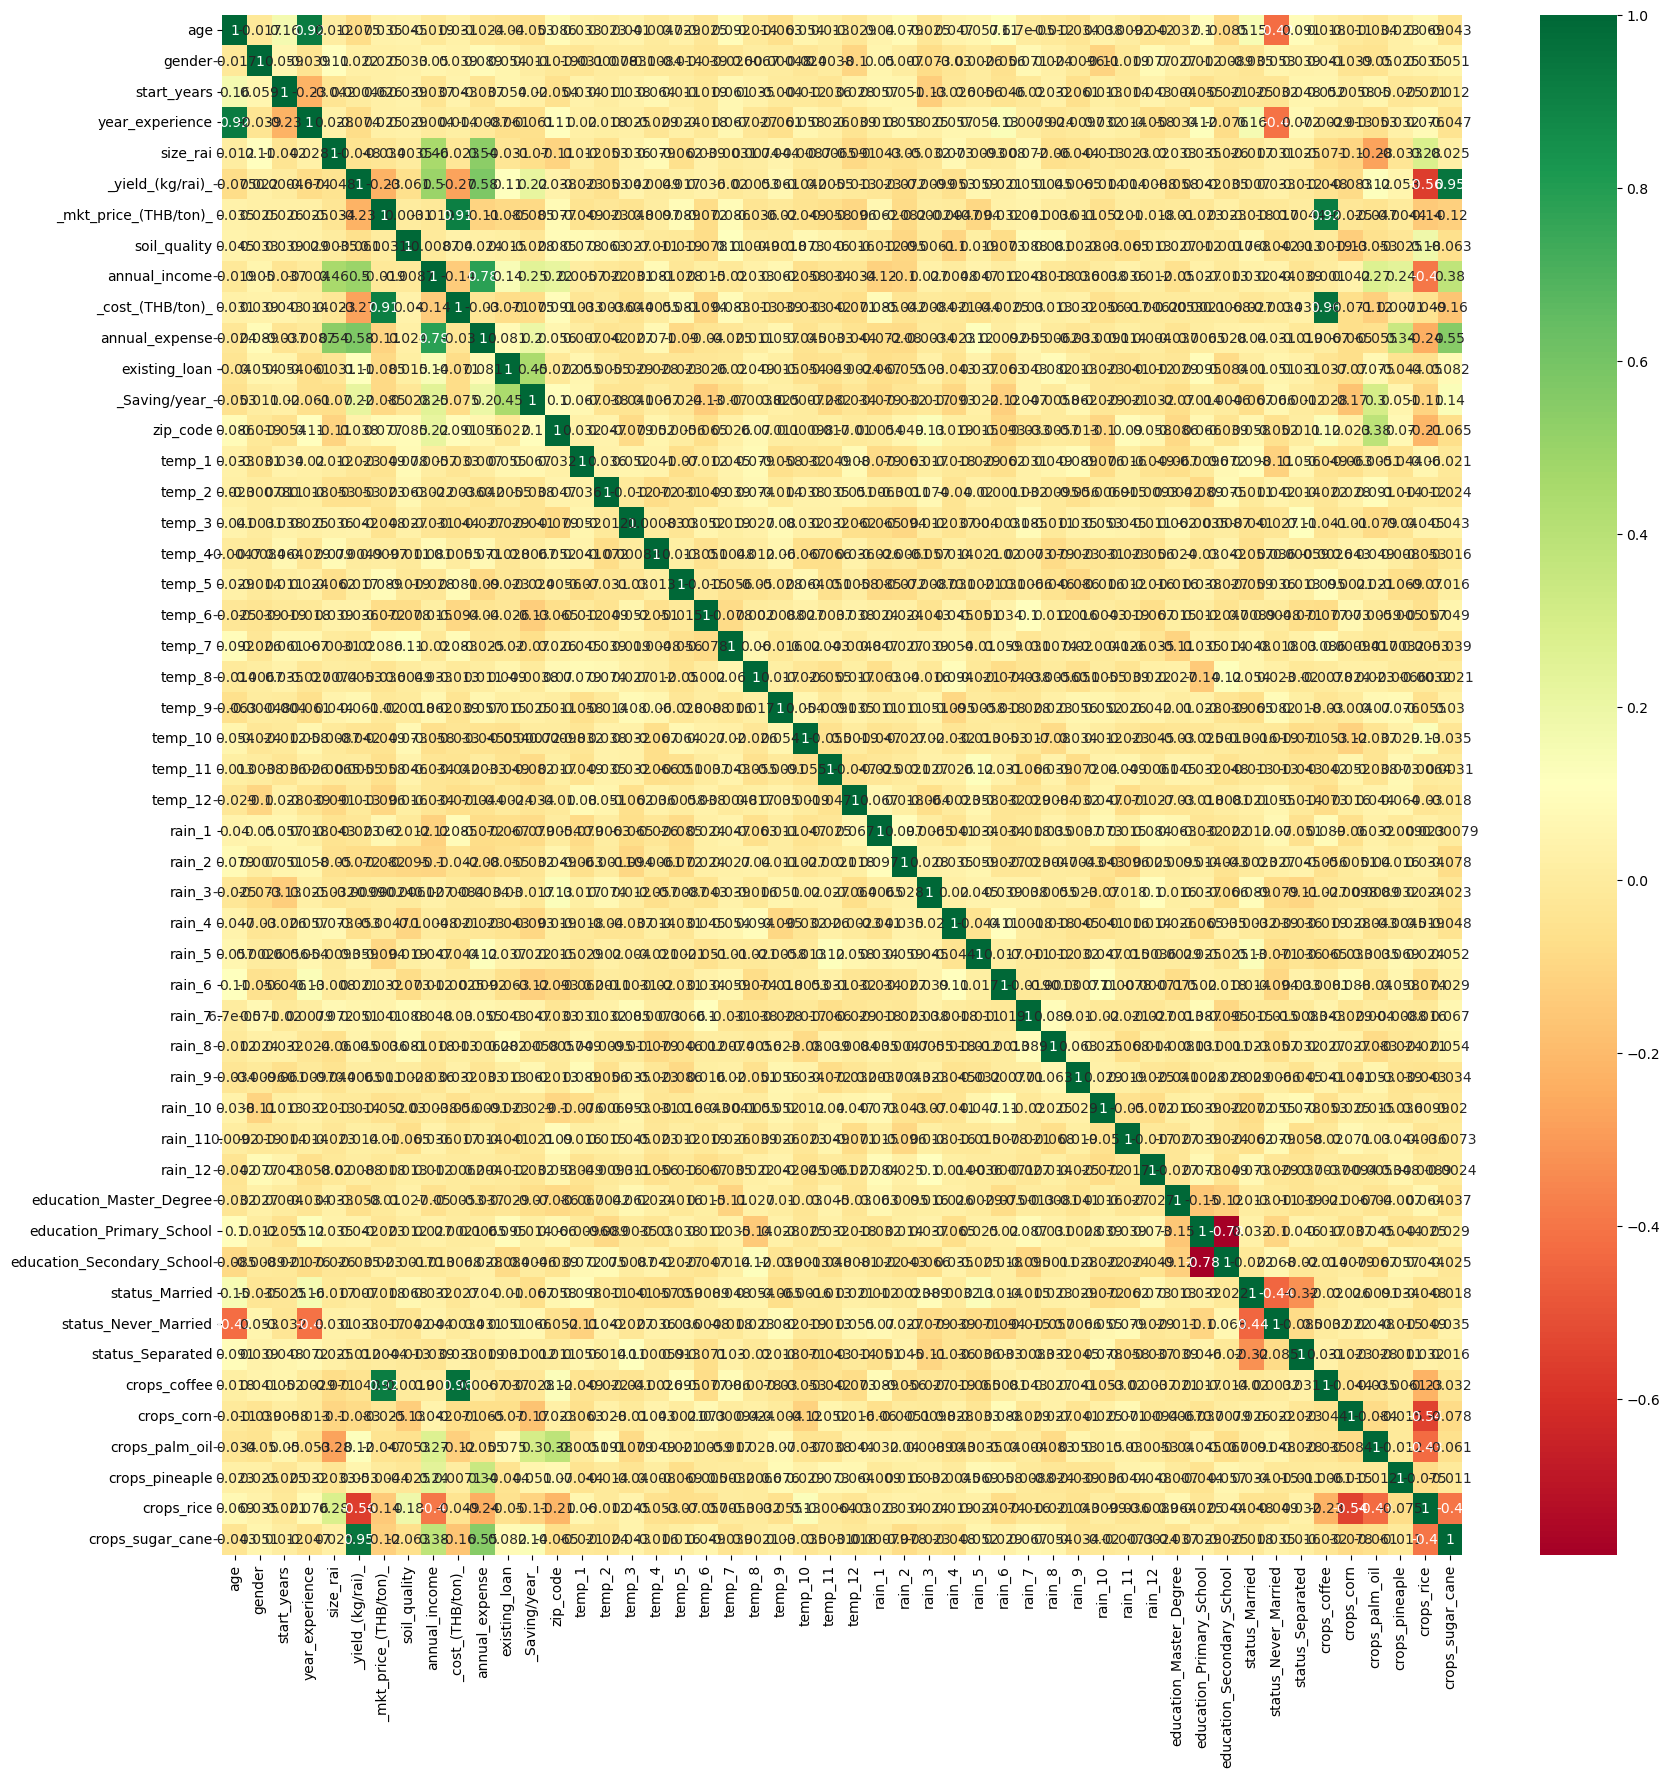

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = X_Encoded.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(X_Encoded[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Preliminary XGBoost Model

In [45]:
# Prob of Not Default
sum(y_cleaned)/len(y_cleaned)

0.236

In [46]:
# Step 1: Determine the rows in X_Encoded that are not NaN
nan_indices = X_Encoded.isna().any(axis=1)

# Step 2: Filter X_Encoded and Y using the same boolean index
X_Cleaned = X_Encoded.loc[~nan_indices]
Y_Cleaned = y_cleaned.loc[~nan_indices]


In [47]:
print(nan_indices)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool


### Split the dataset

In [48]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X_Cleaned, Y_Cleaned)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [50]:
sum(y_train)/len(y_train)

0.5055555555555555

In [51]:
sum(y_test)/len(y_test)

0.47794117647058826

In [52]:
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic', 
    seed=42, 
    eval_metric='aucpr', 
    early_stopping_rounds=1000
)


In [53]:
clf_xgb.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)], 
    verbose=True
)

[0]	validation_0-aucpr:0.90736
[1]	validation_0-aucpr:0.92061
[2]	validation_0-aucpr:0.92081
[3]	validation_0-aucpr:0.91510
[4]	validation_0-aucpr:0.91820
[5]	validation_0-aucpr:0.92318
[6]	validation_0-aucpr:0.93606
[7]	validation_0-aucpr:0.92974
[8]	validation_0-aucpr:0.93754
[9]	validation_0-aucpr:0.93651
[10]	validation_0-aucpr:0.93406
[11]	validation_0-aucpr:0.94184
[12]	validation_0-aucpr:0.94073
[13]	validation_0-aucpr:0.94683
[14]	validation_0-aucpr:0.95254
[15]	validation_0-aucpr:0.95225
[16]	validation_0-aucpr:0.95327
[17]	validation_0-aucpr:0.95659
[18]	validation_0-aucpr:0.95761
[19]	validation_0-aucpr:0.95813
[20]	validation_0-aucpr:0.95869
[21]	validation_0-aucpr:0.95908
[22]	validation_0-aucpr:0.95739
[23]	validation_0-aucpr:0.96057
[24]	validation_0-aucpr:0.96182
[25]	validation_0-aucpr:0.96178
[26]	validation_0-aucpr:0.96024
[27]	validation_0-aucpr:0.96045
[28]	validation_0-aucpr:0.95917
[29]	validation_0-aucpr:0.96024
[30]	validation_0-aucpr:0.96212
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=1000,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred_proba = clf_xgb.predict_proba(X_test)[:, 1]

In [55]:
y_pred_proba

array([6.20337427e-01, 6.62308276e-01, 2.42031776e-04, 9.85247135e-01,
       9.96414661e-01, 9.88137782e-01, 1.09265067e-01, 9.10042822e-01,
       9.99590099e-01, 9.99175966e-01, 9.71358597e-01, 9.99291301e-01,
       9.96319294e-01, 9.03656185e-01, 2.44149077e-03, 8.53779144e-04,
       3.90003040e-03, 9.86097455e-01, 3.93035673e-02, 9.98625636e-01,
       2.88955576e-04, 4.26512066e-04, 7.04071904e-03, 6.00448810e-04,
       9.99679327e-01, 9.99946962e-04, 1.79701611e-01, 9.98703718e-01,
       9.97782886e-01, 9.96187031e-01, 9.91805315e-01, 5.51603688e-03,
       9.93109822e-01, 9.05344486e-01, 2.18730746e-03, 1.69068985e-02,
       9.84521985e-01, 9.99010921e-01, 9.94855285e-01, 7.17381365e-04,
       9.98906493e-01, 7.06576586e-01, 9.97456491e-01, 9.40457627e-04,
       9.83457804e-01, 1.38894445e-03, 5.49781695e-03, 8.64766717e-01,
       9.98764634e-01, 3.91801357e-01, 1.05032022e-03, 9.96283710e-01,
       9.99175370e-01, 4.83379350e-04, 9.52122957e-02, 9.99665737e-01,
      

In [56]:
y_pred = clf_xgb.predict(X_test)

In [57]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC: {roc_auc}')

ROC-AUC: 0.9679306608884074


In [58]:
cm = confusion_matrix(y_test, y_pred)

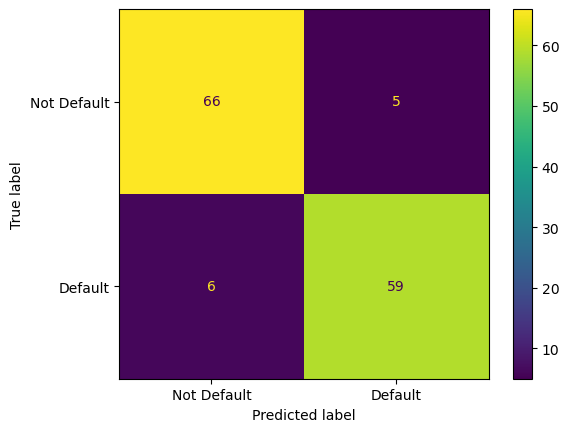

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Default", "Default"])
disp.plot(values_format='d')

In [60]:
from sklearn.metrics import accuracy_score

# Assuming y_test are the true labels and y_pred are the predicted labels
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')


Accuracy: 91.91%


# Optimizing Parameters

In [61]:
params = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'gamma': [0.00, 0.10, 0.20, 0.30, 0.40],
    'reg_lambda': [0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7]
}


In [62]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [63]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [64]:
classifier = xgb.XGBClassifier()

In [65]:
random_search = RandomizedSearchCV(classifier, 
                                   param_distributions=params, 
                                   n_iter = 100, 
                                   scoring = 'roc_auc', 
                                   n_jobs = -1, 
                                   cv = 10, 
                                   verbose = 3)

In [66]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits

 Time taken: 0 hours 0 minutes and 39.99 seconds.


In [67]:
random_search.best_params_

{'scale_pos_weight': 4,
 'reg_lambda': 10.0,
 'min_child_weight': 2,
 'max_depth': 13,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [68]:
best_params = random_search.best_params_

In [69]:
clf_xgb_best = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42,
    **best_params
)

In [70]:
clf_xgb_best.set_params(eval_metric='aucpr', early_stopping_rounds=100)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
clf_xgb_best.fit(
    X_train, 
    y_train, 
    eval_set=[(X_test, y_test)], 
    #eval_metric='aucpr', 
    #early_stopping_rounds=20, 
    verbose=True
)

[0]	validation_0-aucpr:0.81400
[1]	validation_0-aucpr:0.86706
[2]	validation_0-aucpr:0.92736
[3]	validation_0-aucpr:0.93032
[4]	validation_0-aucpr:0.93785
[5]	validation_0-aucpr:0.95934
[6]	validation_0-aucpr:0.95702
[7]	validation_0-aucpr:0.95922
[8]	validation_0-aucpr:0.96024
[9]	validation_0-aucpr:0.95301
[10]	validation_0-aucpr:0.95419
[11]	validation_0-aucpr:0.95697
[12]	validation_0-aucpr:0.96099
[13]	validation_0-aucpr:0.96512
[14]	validation_0-aucpr:0.96417
[15]	validation_0-aucpr:0.96739
[16]	validation_0-aucpr:0.96970
[17]	validation_0-aucpr:0.96996
[18]	validation_0-aucpr:0.97001
[19]	validation_0-aucpr:0.96956
[20]	validation_0-aucpr:0.96853
[21]	validation_0-aucpr:0.96817
[22]	validation_0-aucpr:0.96615
[23]	validation_0-aucpr:0.96689
[24]	validation_0-aucpr:0.96663
[25]	validation_0-aucpr:0.96652
[26]	validation_0-aucpr:0.96843
[27]	validation_0-aucpr:0.96722
[28]	validation_0-aucpr:0.96891
[29]	validation_0-aucpr:0.96888
[30]	validation_0-aucpr:0.96946
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=100,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
clf_xgb_best.score(X_test, y_test)

0.9117647058823529

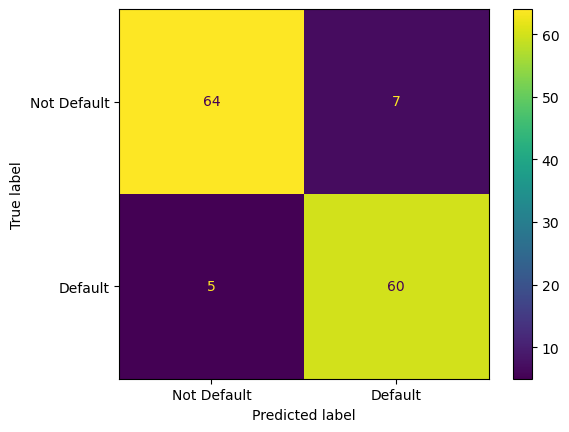

In [73]:
y_pred = clf_xgb_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Default", "Default"])
disp.plot(values_format='d')

In [74]:
from sklearn.metrics import accuracy_score

# Assuming y_test are the true labels and y_pred are the predicted labels
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 91.18%


In [75]:
clf_xgb_tree = xgb.XGBClassifier(
    objective = 'binary:logistic',
    seed = 42,
    **best_params,
    n_estimators = 1)
clf_xgb_tree.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

weight:  {'year_experience': 3.0, '_yield_(kg/rai)_': 5.0, '_mkt_price_(THB/ton)_': 6.0, 'temp_1': 1.0, 'temp_4': 2.0, 'temp_7': 2.0, 'temp_12': 3.0, 'rain_2': 2.0, 'rain_5': 1.0, 'rain_6': 1.0}
gain:  {'year_experience': 0.7711359858512878, '_yield_(kg/rai)_': 10.907827377319336, '_mkt_price_(THB/ton)_': 38.31178665161133, 'temp_1': 12.599997520446777, 'temp_4': 18.85671615600586, 'temp_7': 9.510380744934082, 'temp_12': 5.160942554473877, 'rain_2': 4.091863632202148, 'rain_5': 13.574878692626953, 'rain_6': 22.18151092529297}
cover:  {'year_experience': 52.198028564453125, '_yield_(kg/rai)_': 22.844730377197266, '_mkt_price_(THB/ton)_': 67.96924591064453, 'temp_1': 49.96181106567383, 'temp_4': 109.72178649902344, 'temp_7': 11.12224006652832, 'temp_12': 72.20629119873047, 'rain_2': 85.44705200195312, 'rain_5': 23.303743362426758, 'rain_6': 65.32109832763672}
total_gain:  {'year_experience': 2.3134078979492188, '_yield_(kg/rai)_': 54.53913879394531, '_mkt_price_(THB/ton)_': 229.870727539

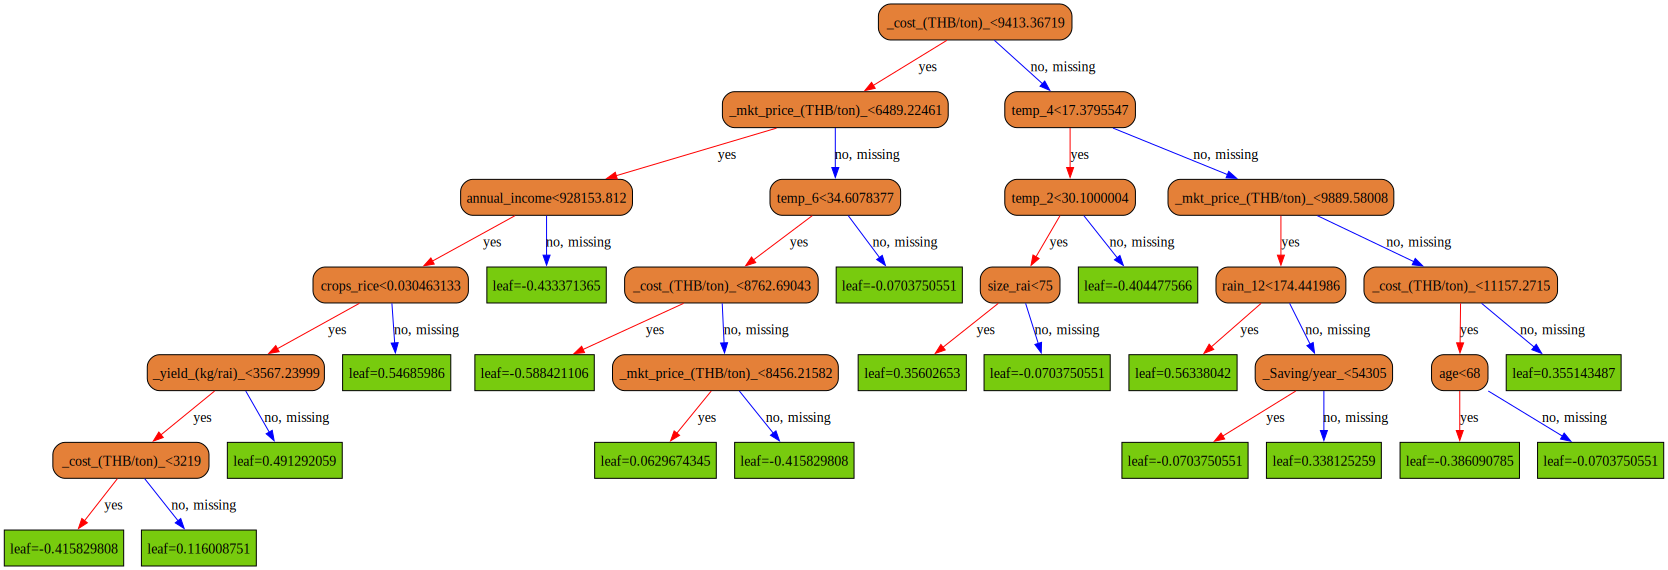

In [76]:
bst = clf_xgb_tree.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type=importance_type))

node_params = {'shape': 'box',
               'style': 'filled, rounded',
               'fillcolor': '#e48038'}
leaf_params = {'shape': 'box',
               'style': 'filled',
               'fillcolor': '#78cbe'}

xgb.to_graphviz(clf_xgb, num_trees = 0, size ="10, 10",
                condition_node_params=node_params,
                leaf_node_params=leaf_params)

In [77]:
dot_data = xgb.to_graphviz(clf_xgb_tree, num_trees=0, size="10,10", 
                           condition_node_params=node_params,
                           leaf_node_params=leaf_params)

with open("xgboost_tree.dot", "w") as f:
    f.write(dot_data.source)

In [78]:
import pydotplus
from graphviz import Source

# Load the DOT file
with open("xgboost_tree.dot") as f:
    dot_graph = f.read()

# Use pydotplus to convert to a Graphviz object
graph = pydotplus.graph_from_dot_data(dot_graph)

# Save as a JPG file
graph.write_jpg("xgboost_tree.jpg")

True

In [79]:
y_pred_proba = clf_xgb_best.predict_proba(X_test)[:, 1]

In [80]:
y_pred_proba

array([0.89584106, 0.673817  , 0.04329017, 0.9554021 , 0.9789202 ,
       0.95700365, 0.6374051 , 0.92184067, 0.99497706, 0.99608225,
       0.951256  , 0.9787354 , 0.9833451 , 0.94069743, 0.08401973,
       0.06983828, 0.15150712, 0.98255473, 0.1149888 , 0.9942404 ,
       0.03349071, 0.02230782, 0.29058552, 0.03322443, 0.97942644,
       0.05912487, 0.36060438, 0.99447143, 0.9747253 , 0.9565076 ,
       0.979818  , 0.14886554, 0.87859124, 0.7502527 , 0.0855537 ,
       0.21473144, 0.9448586 , 0.9608696 , 0.9341008 , 0.11312831,
       0.9888888 , 0.50677127, 0.980808  , 0.0945632 , 0.81122434,
       0.09040216, 0.08505934, 0.74023867, 0.989677  , 0.69591683,
       0.08856124, 0.97735995, 0.9878299 , 0.02047549, 0.40234706,
       0.99788314, 0.09408075, 0.4727666 , 0.05360077, 0.28003964,
       0.06885945, 0.96428376, 0.9329521 , 0.13835916, 0.9657946 ,
       0.04299405, 0.98538196, 0.06961118, 0.747846  , 0.9848995 ,
       0.09272658, 0.6245991 , 0.47747394, 0.07708549, 0.04331

In [83]:
results = pd.DataFrame({'probability_of_default': y_pred_proba, 'true_label': y_test})

In [84]:
results

,probability_of_default,true_label
641,0.895841,1
302,0.673817,1
369,0.043290,0
493,0.955402,1
579,0.978920,1
...,...,...
51,0.260136,0
204,0.971790,1
544,0.941404,1
428,0.127794,0


In [95]:
results = results.sort_values(by='probability_of_default', ascending=False)

In [96]:
results['decile'] = pd.qcut(results['probability_of_default'], 10, labels=False) + 1

In [97]:
results

,probability_of_default,true_label,decile,credit_rating
480,0.997883,1,10,AAA
478,0.996082,1,10,AAA
482,0.996076,1,10,AAA
629,0.996046,1,10,AAA
663,0.994977,1,10,AAA
...,...,...,...,...
131,0.025794,0,1,D
165,0.025038,0,1,D
208,0.024076,0,1,D
220,0.022308,0,1,D


In [102]:
results['credit_rating'] = results['decile'].map({
    10: 'D', 9: 'C', 8: 'C', 7: 'B', 6: 'B', 5: 'A', 4: 'A', 3: 'AA', 2: 'AA', 1: 'AAA'
})

In [103]:
results

,probability_of_default,true_label,decile,credit_rating
480,0.997883,1,10,D
478,0.996082,1,10,D
482,0.996076,1,10,D
629,0.996046,1,10,D
663,0.994977,1,10,D
...,...,...,...,...
131,0.025794,0,1,AAA
165,0.025038,0,1,AAA
208,0.024076,0,1,AAA
220,0.022308,0,1,AAA


In [107]:
decile_min = results.groupby('decile')['probability_of_default'].min().sort_index()

In [109]:
def assign_credit_rating(probability):
    if probability <= decile_min.iloc[0]:
        return 'AAA'
    elif probability <= decile_min.iloc[1]:
        return 'AA'
    elif probability <= decile_min.iloc[2]:
        return 'AA'
    elif probability <= decile_min.iloc[3]:
        return 'A'
    elif probability <= decile_min.iloc[4]:
        return 'A'
    elif probability <= decile_min.iloc[5]:
        return 'B'
    elif probability <= decile_min.iloc[6]:
        return 'B'
    elif probability <= decile_min.iloc[7]:
        return 'C'
    elif probability <= decile_min.iloc[8]:
        return 'C'
    else:
        return 'D'

In [110]:
X_test

,age,gender,start_years,year_experience,size_rai,_yield_(kg/rai)_,_mkt_price_(THB/ton)_,soil_quality,annual_income,_cost_(THB/ton)_,...,education_Secondary_School,status_Married,status_Never_Married,status_Separated,crops_coffee,crops_corn,crops_palm_oil,crops_pineaple,crops_rice,crops_sugar_cane
641,49,0,34,15,41.844677,436.049935,8190.996719,2,141996.261131,8316.243310,...,0.688030,1.000000,0.0,0.0,0.000000,0.0,0.31197,0.0,0.688030,0.000000
302,50,1,25,25,64.310000,354.710000,10138.570000,1,231264.720000,11372.520000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,1.000000,0.000000
369,73,1,21,52,80.000000,379.740000,9655.410000,0,293325.140000,7212.300000,...,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.00000,0.0,1.000000,0.000000
493,54,1,30,24,50.762840,6247.606402,28593.133599,2,384988.299116,29989.289303,...,0.000000,0.421135,0.0,0.0,0.421135,0.0,0.00000,0.0,0.000000,0.578865
579,77,0,26,51,138.329088,355.920653,8995.150612,0,441809.144313,10369.642538,...,0.000000,0.273961,0.0,0.0,0.000000,0.0,0.00000,0.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,71,0,18,53,60.000000,340.660000,8504.470000,1,173828.130000,5903.140000,...,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,1.000000,0.000000
204,70,0,30,40,45.000000,582.380000,4949.420000,3,129710.630000,11151.430000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,1.000000,0.000000
544,40,0,20,19,108.501846,1506.057016,8688.462912,2,608649.494562,10043.755270,...,0.908201,1.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.908201,0.091799
428,45,0,20,25,38.000000,357.910000,10316.960000,2,140317.790000,8525.500000,...,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,1.000000,0.000000


In [117]:
new_customer = pd.DataFrame({
    'age': [45],
    'gender': [0],  # 0 for female, 1 for male (based on your data)
    'start_years': [20],
    'year_experience': [25],
    'size_rai': [50],
    '_yield_(kg/rai)_': [500],
    '_mkt_price_(THB/ton)_': [9000],
    'soil_quality': [2],  # Assuming 2 is a valid category for soil quality
    'annual_income': [300000],
    '_cost_(THB/ton)_': [8000],
    'education_Primary_School': [1],  # One-hot encoded education level
    'education_Secondary_School': [0],
    'education_High_School': [0],
    'status_Married': [1],  # One-hot encoded marital status
    'status_Never_Married': [0],
    'status_Divorced': [0],
    'status_Separated': [0],
    'crops_coffee': [0],  # One-hot encoded crops
    'crops_corn': [0],
    'crops_palm_oil': [0],
    'crops_pineaple': [0],
    'crops_rice': [1],
    'crops_sugar_cane': [0]
})

In [119]:

# Ensure all necessary columns are included (same as X_test)
for col in X_test.columns:
    if col not in new_customer.columns:
        new_customer[col] = 0

# Reorder the columns to match X_test
new_customer = new_customer[X_test.columns]

In [120]:
probability_of_default = clf_xgb_best.predict_proba(new_customer)[:, 1][0]

In [121]:
credit_rating = assign_credit_rating(probability_of_default)

In [122]:
print(f"Probability of Default: {probability_of_default}")
print(f"Credit Rating: {credit_rating}")

Probability of Default: 0.18931551277637482
Credit Rating: B
